Buy Price:     57910.0
Initial price: 57625.0
Maximum price: 62907.0
Last price:    63407.0
Sell price:    50325.6 -13.10%


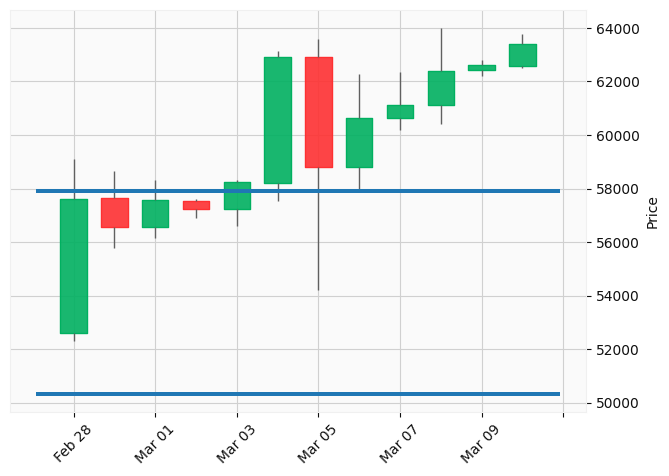

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

from tvDatafeed import TvDatafeed

tv = TvDatafeed()
data = tv.get_hist(
    "BTCEUR",
    exchange="",
    n_bars=1000,
)

date = pd.Timestamp("2024-02-28 01:00:00")
initial_price = data.loc[date].close

dates = data.index

bool_array = dates >= date
bool_array[-1] = False

maximum_price = data[bool_array].close.values.max()
sell_price = maximum_price * 0.8

buy_price = 57910.0
print(f"Buy Price:     {buy_price}")
print(f"Initial price: {initial_price}")
print(f"Maximum price: {maximum_price}")
print(f"Last price:    {data.close.iloc[-1]}")
print(f"Sell price:    {sell_price:.1f} -{1-sell_price/buy_price:.2%}")

bool_array[-1] = True
mc = mpf.make_marketcolors(base_mpf_style="yahoo")
s = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=mc)
mpf.plot(data[bool_array], type="candle", hlines=[sell_price, buy_price], style=s)